In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import os,glob
import matplotlib
import matplotlib.pyplot as plt
import sys ; sys.path.append("../")
from utils.pyfunctions import *

### Readin full OAAT

In [66]:
key = './clm6_minioaat.csv'
df_key = pd.read_csv(key)
la=xr.open_dataset('./utils/sparsegrid_landarea.nc').landarea

In [67]:
in_file = '/glade/campaign/cgd/tss/projects/PPE/ctsm530_OAAT/postp/ctsm530_oaat_postp_1986-2005.nc'
ds = xr.open_dataset(in_file)

ds = ds.assign_coords(
    id=('ens', df_key['key'].values),
    param=('ens', df_key['param'].values),
    minmax=('ens', df_key['minmax'].values)
)

ds_oaat = ds.set_index(ens=["param", "minmax", "id"], append=True)

In [68]:
default = ds_oaat.isel(ens=100)

### Readin test OAAT ensemble members

In [136]:
key = '/glade/work/linnia/CLM6-PPE/CLM6_miniOAAT/clm6_minioaat_extras.csv'
df_key = pd.read_csv(key)
la=xr.open_dataset('./utils/sparsegrid_landarea.nc').landarea

In [137]:
df_key

,key,param,minmax,ran
0,oaat0175,bsw_sf,max,1
1,oaat0185,vcmaxse_sf,max,1
2,oaat0186,jmaxse_sf,max,1
3,oaat0187,tpu25ratio,min,1
4,oaat0188,tpu25ratio,max,1
5,oaat0189,r_mort,min,1
6,oaat0190,r_mort,max,1
7,oaat0191,medlynintercept,max,1
8,oaat0192,medlynintercept,max,1
9,oaat0193,hksat_sf,max,1


In [62]:
yy = (1986,2005)
dir='/glade/campaign/cgd/tss/projects/PPE/ctsm530_OAAT/hist/'

exp='oaat'
tape='h0'
utils_path = '/glade/u/home/linnia/CLM6-PPE/clm6-oaat/utils/'

dvs=['GPP','AR','HR','NPP','NBP','NEP','ER',
     'EFLX_LH_TOT','FCTR','FCEV','FGEV','BTRANMN','FGR','FSH',
     'SOILWATER_10CM','TWS','QRUNOFF','SNOWDP','H2OSNO','FSNO',
     'TLAI','FSR','ALTMAX','TV','TG',
     'FAREA_BURNED','COL_FIRE_CLOSS',
     'TOTVEGC','TOTECOSYSC','TOTSOMC_1m',
     'TOTVEGN','TOTECOSYSN']


In [63]:
ds= get_exp(exp,dir,key,dvs,'h0',yy,utils_path)

In [64]:
la=xr.open_dataset(utils_path+'sparsegrid_landarea.nc').landarea
b=xr.open_dataset(utils_path+'whit/whitkey.nc').biome
out=xr.Dataset()
for v in dvs:

        x=amean(ds[v])
        amp=(ds[v].groupby('time.year').max()-ds[v].groupby('time.year').min()).mean(dim='year').compute()

        out[v+'_gridded_mean']=x.mean(dim='year')

        out[v+'_global_amp'] =gmean(amp,la)
        out[v+'_global_std'] =gmean(x.std(dim='year'),la)
        out[v+'_global_mean']=gmean(x.mean(dim='year'),la)

        out[v+'_biome_amp']  =bmean(amp,la,b)
        out[v+'_biome_std']  =bmean(x.std(dim='year'),la,b)
        out[v+'_biome_mean'] =bmean(x.mean(dim='year'),la,b)

        for dv in out.data_vars:
            if v in dv:
                out[dv].attrs=ds[v].attrs

/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/glade/u/home/linnia/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=

In [65]:
key = '/glade/work/linnia/CLM6-PPE/CLM6_miniOAAT/clm6_minioaat_extras.csv'
df_key = pd.read_csv(key)

out = out.assign_coords(
    id=('ens', df_key['key'].values),
    param=('ens', df_key['param'].values),
    minmax=('ens', df_key['minmax'].values)
)

postp_extras = out.set_index(ens=["param", "minmax", "id"], append=True)

### r_mort range

In [121]:
vars =  ['NBP_global_mean','GPP_global_mean','ER_global_mean',
         'TOTSOMC_1m_global_mean','TOTECOSYSC_global_mean','TOTVEGC_global_mean',
         'TLAI_global_mean','EFLX_LH_TOT_global_mean','QRUNOFF_global_mean']
cfs = [24*60*60*365*1e-9*la.sum().values,24*60*60*365*1e-9*la.sum().values,24*60*60*365*1e-9*la.sum().values,
      1e-9*la.sum().values,1e-9*la.sum().values,1e-9*la.sum().values,
      1,1,24*60*60*365]
units = ['(PgC/yr)','(PgC/yr)','(PgC/yr)',
        '(PgC)','(PgC)','(PgC)',
        '(m2/m2)','(W/m2)','(mm/yr)']

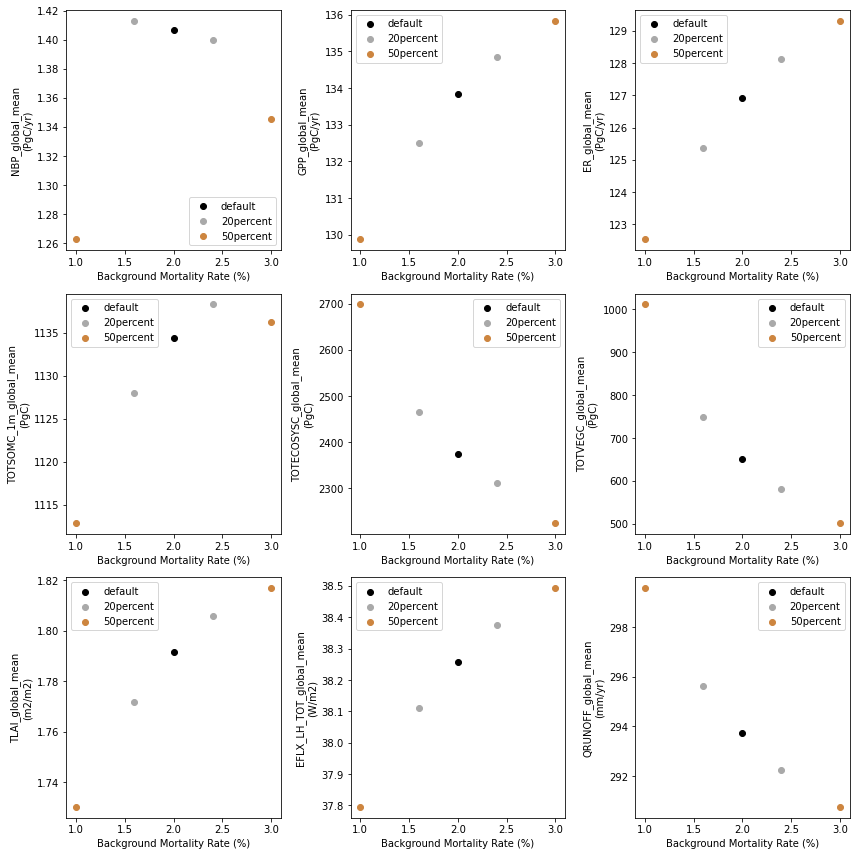

In [128]:
# r_mort
plt.figure(figsize=(12,12))
for i,v in enumerate(vars):
    a = ds_oaat[v].sel(param='r_mort',minmax='min').values
    b = postp_extras[v].sel(id='oaat0189').values
    c = default[v].values
    d = postp_extras[v].sel(id='oaat0190').values
    e = ds_oaat[v].sel(param='r_mort',minmax='max').values
    
    plt.subplot(3,3,i+1)
    plt.scatter([2],cfs[i]*c,c='k',label='default')
    plt.scatter([1.6,2.4],[cfs[i]*b,cfs[i]*d],c='darkgrey',label='20percent')
    plt.scatter([1,3],[cfs[i]*a,cfs[i]*e],c='peru',label='50percent')
    plt.legend()
    plt.ylabel(v+'\n'+units[i])
    plt.xlabel('Background Mortality Rate (%)')

plt.tight_layout()
plt.savefig('./figs/rangetests_rmort_global.png')

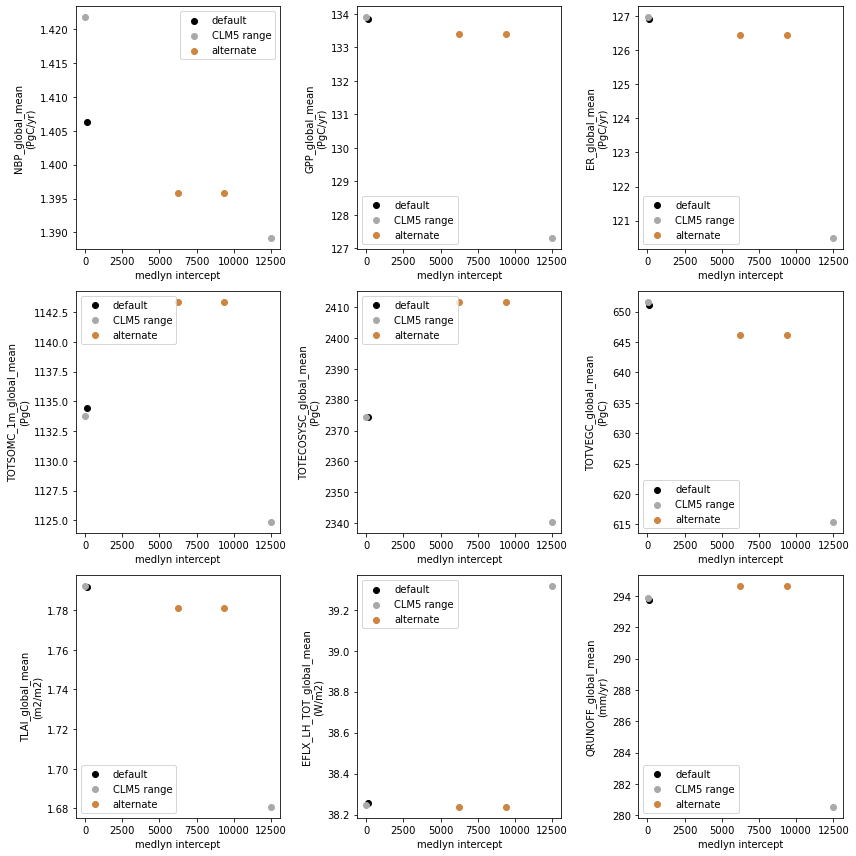

In [133]:
# medlynintercept
plt.figure(figsize=(12,12))
param = 'medlynintercept'
for i,v in enumerate(vars):
    a = ds_oaat[v].sel(param=param,minmax='min').values
    b = default[v].values
    c = postp_extras[v].sel(id='oaat0191').values
    d = postp_extras[v].sel(id='oaat0192').values
    e = ds_oaat[v].sel(param=param,minmax='max').values
    
    plt.subplot(3,3,i+1)
    plt.scatter([100],cfs[i]*b,c='k',label='default')
    plt.scatter([1,12500],[cfs[i]*a,cfs[i]*e],c='darkgrey',label='CLM5 range')
    plt.scatter([6250,9375],[cfs[i]*c,cfs[i]*d],c='peru',label='alternate')
    plt.legend()
    plt.ylabel(v+'\n'+units[i])
    plt.xlabel(param)

plt.tight_layout()
plt.savefig('./figs/rangetests_'+param+'_global.png')

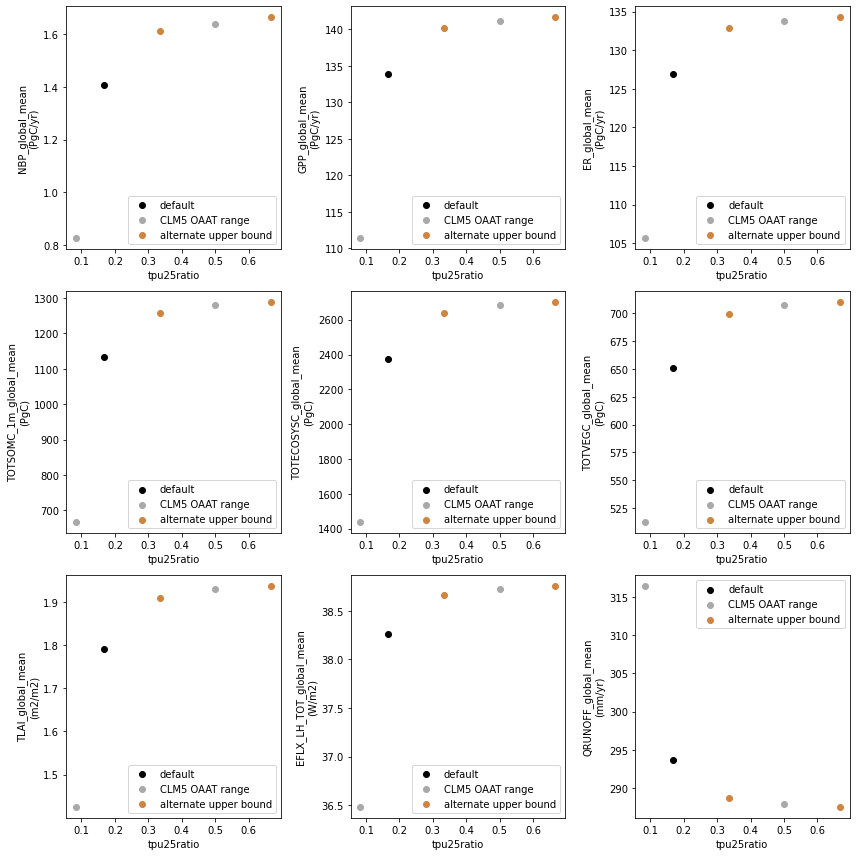

In [144]:
# TPU25ratio
plt.figure(figsize=(12,12))
param = 'tpu25ratio'
for i,v in enumerate(vars):
    a = ds_oaat[v].sel(param=param,minmax='min').values
    b = default[v].values
    c = postp_extras[v].sel(id='oaat0187').values
    d = ds_oaat[v].sel(param=param,minmax='max').values
    e = postp_extras[v].sel(id='oaat0188').values

    plt.subplot(3,3,i+1)
    plt.scatter([0.167],cfs[i]*b,c='k',label='default')
    plt.scatter([0.0835,0.5],[cfs[i]*a,cfs[i]*d],c='darkgrey',label='CLM5 OAAT range')
    plt.scatter([0.334,0.667],[cfs[i]*c,cfs[i]*e],c='peru',label='alternate upper bound')
    plt.legend()
    plt.ylabel(v+'\n'+units[i])
    plt.xlabel('tpu25ratio')

plt.tight_layout()
plt.savefig('./figs/rangetests_tpu25ratio_global.png')

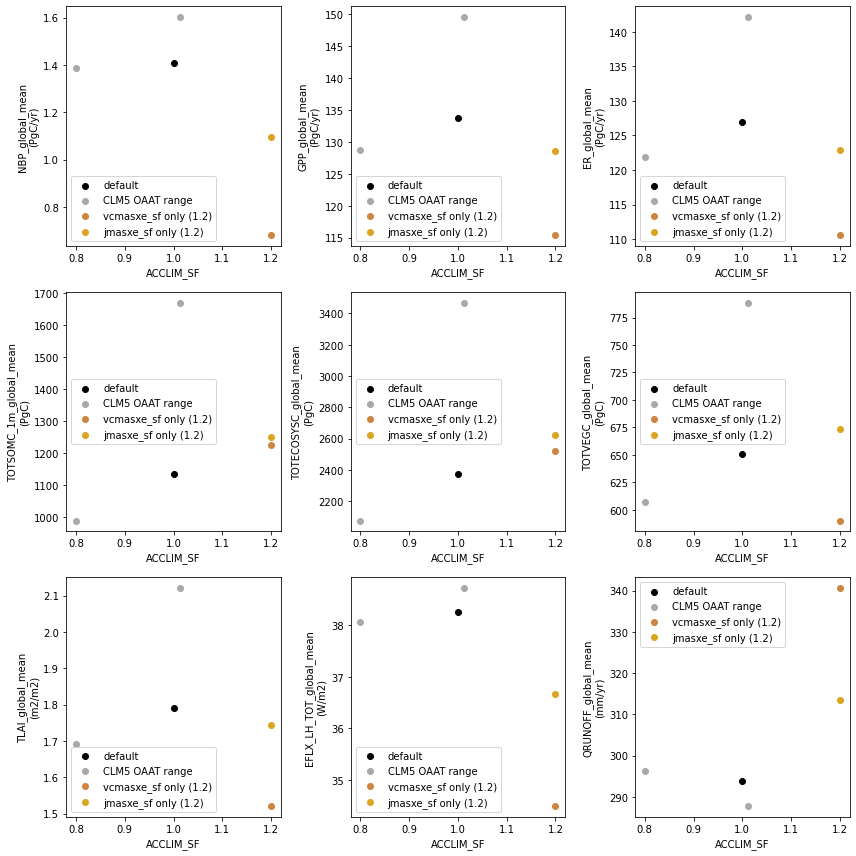

In [151]:
# vcmaxse_sf
plt.figure(figsize=(12,12))
param = 'ACCLIM_SF'
for i,v in enumerate(vars):
    a = ds_oaat[v].sel(param=param,minmax='min').values
    b = default[v].values
    c = postp_extras[v].sel(id='oaat0185').values
    d = ds_oaat[v].sel(param=param,minmax='max').values
    e = postp_extras[v].sel(id='oaat0186').values

    plt.subplot(3,3,i+1)
    plt.scatter([1],cfs[i]*b,c='k',label='default')
    plt.scatter([0.8,1.0125],[cfs[i]*a,cfs[i]*d],c='darkgrey',label='CLM5 OAAT range')
    plt.scatter([1.2],cfs[i]*c,c='peru',label='vcmasxe_sf only (1.2)')
    plt.scatter([1.2],cfs[i]*e,c='goldenrod',label='jmasxe_sf only (1.2)')
    plt.legend()
    plt.ylabel(v+'\n'+units[i])
    plt.xlabel(param)

plt.tight_layout()
plt.savefig('./figs/rangetests_'+param+'_global.png')

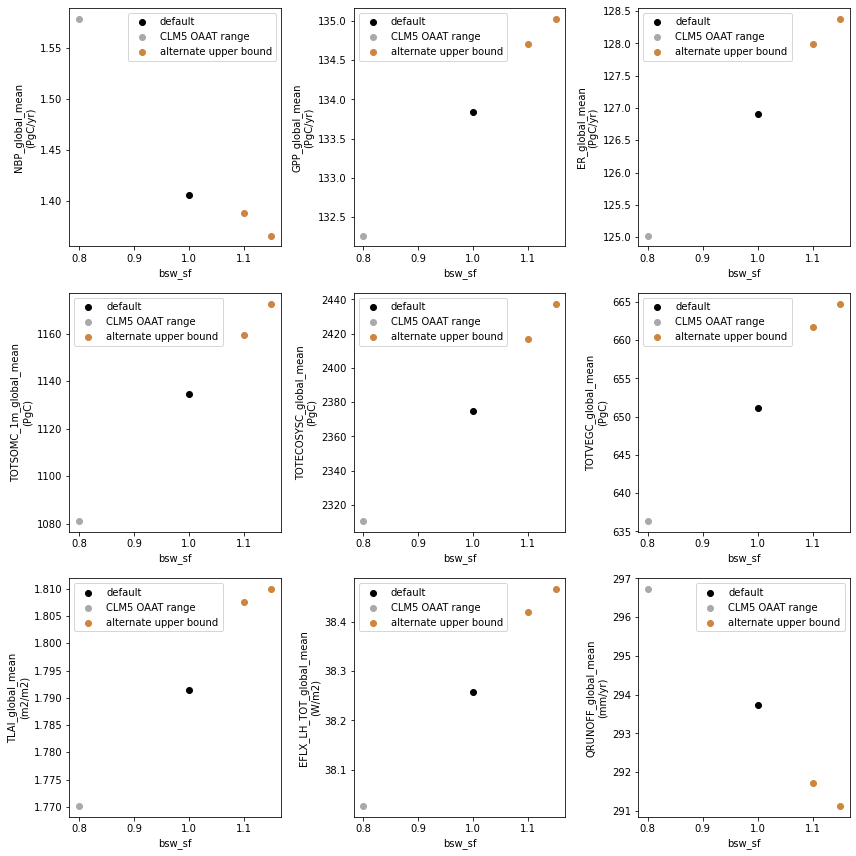

In [152]:
# bsw_sf
plt.figure(figsize=(12,12))
param = 'bsw_sf'
for i,v in enumerate(vars):
    a = ds_oaat[v].sel(param=param,minmax='min').values
    b = default[v].values
    c = postp_extras[v].sel(id='oaat0175').values
    d = postp_extras[v].sel(id='oaat0197').values

    plt.subplot(3,3,i+1)
    plt.scatter([1],cfs[i]*b,c='k',label='default')
    plt.scatter([0.8],cfs[i]*a,c='darkgrey',label='CLM5 OAAT range')
    plt.scatter([1.1,1.15],[cfs[i]*c,cfs[i]*d],c='peru',label='alternate upper bound')
    plt.legend()
    plt.ylabel(v+'\n'+units[i])
    plt.xlabel(param)

plt.tight_layout()
plt.savefig('./figs/rangetests_'+param+'_global.png')

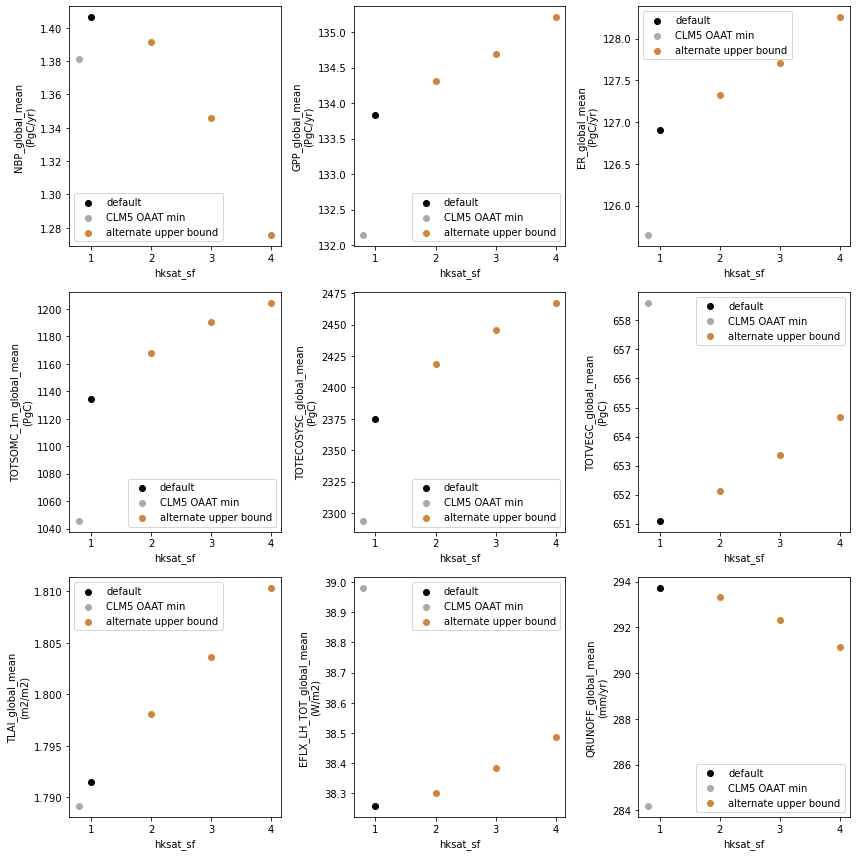

In [153]:
# hksat_sf
plt.figure(figsize=(12,12))
param = 'hksat_sf'
for i,v in enumerate(vars):
    a = ds_oaat[v].sel(param=param,minmax='min').values
    b = default[v].values
    c = postp_extras[v].sel(id='oaat0193').values
    d = postp_extras[v].sel(id='oaat0194').values
    e = postp_extras[v].sel(id='oaat0195').values

    plt.subplot(3,3,i+1)
    plt.scatter([1],cfs[i]*b,c='k',label='default')
    plt.scatter([0.9],cfs[i]*a,c='darkgrey',label='CLM5 OAAT min')
    plt.scatter([2,3,4],[cfs[i]*c,cfs[i]*d,cfs[i]*e],c='peru',label='alternate upper bound')
    plt.legend()
    plt.ylabel(v+'\n'+units[i])
    plt.xlabel(param)

plt.tight_layout()
plt.savefig('./figs/rangetests_'+param+'_global.png')

### Survivability evaluation